<a href="https://colab.research.google.com/github/notness3/ml_edu/blob/main/LinearRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Бинарная классификация с помощью логистического регрессора

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem1/data/iris.csv', 
                 header=None, names = ['Длина_чашелистника', 'Ширина_чашелистника','Длина_лепестка', 'Ширина_лепестка', 'Класс' ])
df.head()

,Длина_чашелистника,Ширина_чашелистника,Длина_лепестка,Ширина_лепестка,Класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


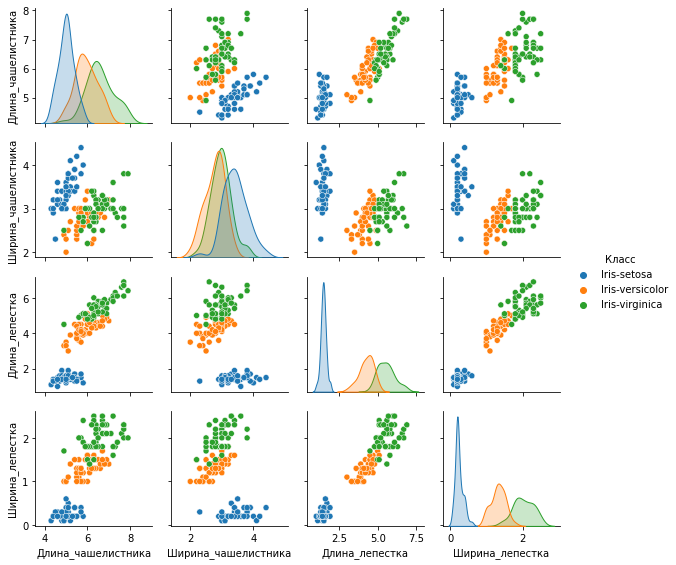

In [3]:
sns.pairplot(df, hue='Класс', height=2)
plt.show()

In [4]:
df_erase = df.drop(index=df.index[df['Класс']=='Iris-setosa'])

In [5]:
df_erase.loc[df_erase['Класс']=='Iris-versicolor', df_erase.columns=='Класс']=-1
df_erase.loc[df_erase['Класс']=='Iris-virginica', df_erase.columns=='Класс']=1

In [7]:
y = df_erase['Класс']
y = np.array(y, dtype=np.int64)
X = df_erase.drop('Класс', axis=1)

In [8]:
model = LogisticRegression(random_state=0, max_iter=2000)
model.fit(X, y)
model.coef_

array([[-0.39443136, -0.51327025,  2.93075043,  2.4170433 ]])

#Многоклассовая классификация
#Один против всех

In [9]:
df_tree = df.copy()
df_tree.loc[df_tree['Класс']=='Iris-versicolor', df_tree.columns=='Класс']=0
df_tree.loc[df_tree['Класс']=='Iris-virginica', df_tree.columns=='Класс']=1
df_tree.loc[df_tree['Класс']=='Iris-setosa', df_tree.columns=='Класс']=2


In [10]:
y = df_tree['Класс']
y = np.array(y, dtype=np.int64)
X = df_tree.drop('Класс', axis=1)

In [11]:
models = []
model_1 = LogisticRegression(random_state=0, max_iter=2000)
model_2 = LogisticRegression(random_state=0, max_iter=2000)
model_3 = LogisticRegression(random_state=0, max_iter=2000)

model_1.fit(X, np.array(y==0, dtype=np.int64))
models.append(model_1)
model_2.fit(X, np.array(y==1, dtype=np.int64))
models.append(model_2)
model_3.fit(X, np.array(y==2, dtype= np.int64))
models.append(model_3)

In [15]:
for model in models:
  print(model.coef_)

[[-0.18587061 -2.11489439  0.69770617 -1.25139648]]
[[-0.39444575 -0.5132796   2.93082545  2.41710589]]
[[-0.44524582  0.89469401 -2.32542777 -0.97869151]]


In [16]:
scores = np.zeros([3,3])
for k in range(3):
    pred = np.argmax(np.vstack([models[i].predict_proba(X[y==k])[:, 1] for i in range(3)]).T, axis=1)
    for i in range(3):
        scores[i, k] = sum(pred == i)

print(scores)

[[45.  2.  0.]
 [ 5. 48.  0.]
 [ 0.  0. 50.]]
